# Lab 1: Single-qubit and multi-qubit states, quantum teleportation

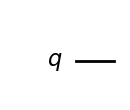

In [1]:
#Trying out
import numpy as np
from qiskit import QuantumCircuit

mycircuit = QuantumCircuit(1)
mycircuit.draw('mpl')


Let's create $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ which can be done by applying the Hadamard gate on the state $\vert1\rangle$.

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


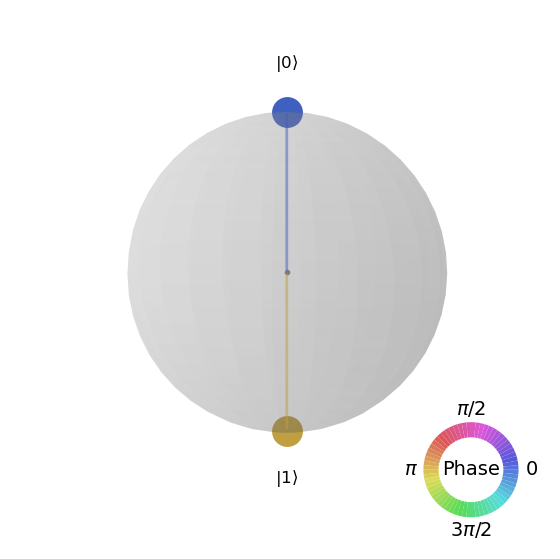

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

sv = Statevector.from_label('1') #Creating the state vector |1 >
mycircuit = QuantumCircuit(1) #Same circuit as the cell from before
mycircuit.h(0) #Hadamard gate on the circuit

new_sv = sv.evolve(mycircuit) #Time goes from left to right of the circuit 
print(new_sv) #New state vector 
plot_state_qsphere(new_sv.data) 

Now you see the proyection of the new state vector on the state from before.
The size of the circle is proportional to the probability of measuring each basis state in the statevector.

The bottom circle, correspond to the basis state $\vert1\rangle$ and has a different color corresponding to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$.

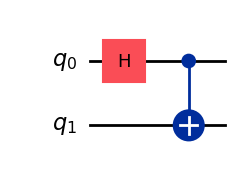

In [3]:
#Now we create a circuit for the Bell states

mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

### Ungraded exercise 1

Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert01\rangle + \vert10\rangle\right)$$ using a similar procedure?

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


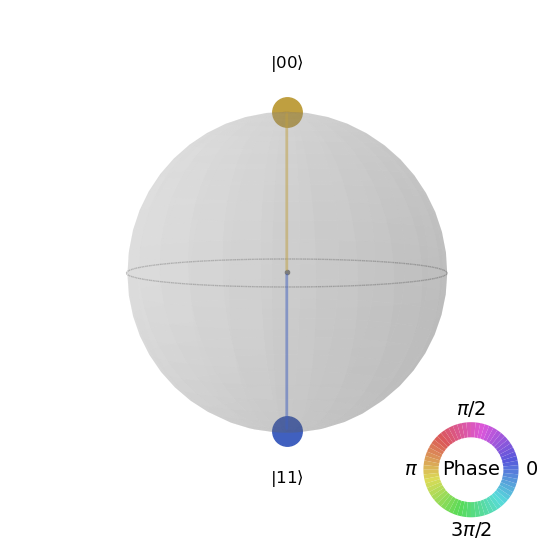

In [4]:
sv_ue1 = Statevector.from_label('01') #Initial state |01 >
mycircuit = QuantumCircuit(2) #Same as before
mycircuit.h(0) #Left to right Hadamard gate to q0
mycircuit.cx(0,1) #Then a CNOT gate
new_sv = sv_ue1.evolve(mycircuit) #Evolving the state
print(new_sv) #New state vector
plot_state_qsphere(new_sv.data)

### Ungraded exercise 2

Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$$ using a similar procedure?

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


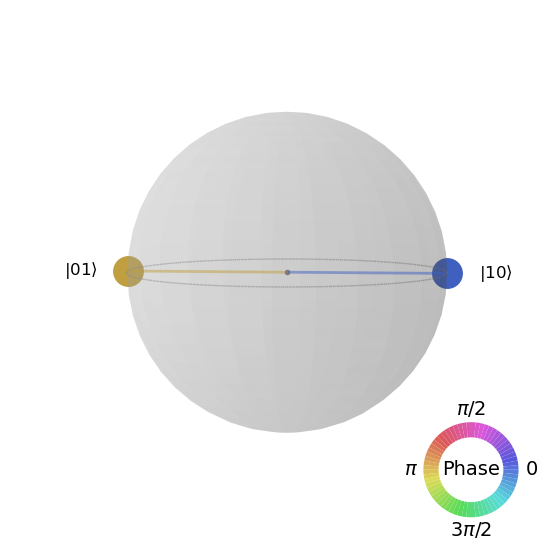

In [5]:
sv_ue2 = Statevector.from_label('11') #Initial state |11 >
mycircuit = QuantumCircuit(2) #Same as before
mycircuit.h(0) #Left to right Hadamard gate to q0
mycircuit.cx(0,1) #Then a CNOT gate
new_sv = sv_ue2.evolve(mycircuit) #Evolving the state
print(new_sv) #New state vector
plot_state_qsphere(new_sv.data)

# Graded exercise 1: Quantum teleportation

In this graded exercise, you will teleport the quantum state 
$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$ from Alice's qubit to Bob's qubit. Recall that the teleportation algorithm consists of four major components:

1. Initializing the state to be teleported. We will do this on Alice's qubit `q0`.
2. Creating entanglement between two qubits. We will use qubits `q1` and `q2` for this. Recall that Alice owns `q1`, and Bob owns `q2`.
3. Applying a Bell measurement on Alice's qubits `q0` and `q1`.
4. Applying classically controlled operations on Bob's qubit `q2` depending on the outcomes of the Bell measurement on Alice's qubits.

This exercise guides you through each of these steps.

### Initializing the state to be teleported

First, create a quantum circuit that creates the state $$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ You can do this by using `Qiskit`'s `initialize` function.

In [6]:
def initialize_qubit(given_circuit, qubit_index):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    given_circuit.initialize([np.sqrt(0.70), np.sqrt(0.30)], qubit_index) #Initial state
 
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

In [7]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    given_circuit.h(qubit_Alice)
    given_circuit.cx(qubit_Alice, qubit_Bob)
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

In [8]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START

    given_circuit.cx(qubit1_Alice, qubit2_Alice)
    given_circuit.h(qubit1_Alice)
    given_circuit.barrier()
    given_circuit.measure(qubit1_Alice, clbit1_Alice)
    given_circuit.measure(qubit2_Alice, clbit2_Alice)

    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

Finally, we apply controlled operations on Bob's qubit. Recall that the controlled operations are applied in this order:

- an $X$ gate is applied on Bob's qubit if the measurement coutcome of Alice's second qubit, `clbit2_Alice`, is `1`.
- a $Z$ gate is applied on Bob's qubit if the measurement coutcome of Alice's first qubit, `clbit1_Alice`, is `1`.

In [9]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    #given_circuit.x(qubit_Bob).c_if(clbit2_Alice, 1)
    #given_circuit.z(qubit_Bob).c_if(clbit1_Alice, 1)    

    with given_circuit.if_test((clbit2_Alice,1)):
        given_circuit.x(qubit_Bob)
    
    with given_circuit.if_test((clbit1_Alice,1)):
        given_circuit.z(qubit_Bob)
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

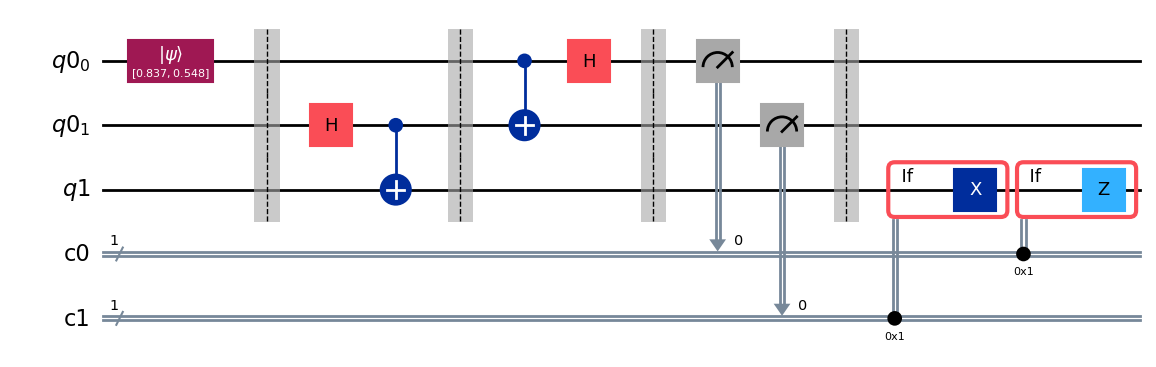

In [10]:
### imports
from qiskit import QuantumRegister, ClassicalRegister

### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2) #How many qubits Alice has
all_qubits_Bob = QuantumRegister(1) #How many qubits Bob has
creg1_Alice = ClassicalRegister(1) 
creg2_Alice = ClassicalRegister(1)

### quantum teleportation circuit here
# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()
# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()
# Apply classically controlled quantum gates with the ifs involved
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

### Draw of the complete circuit
mycircuit.draw('mpl')